In [7]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = 'hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)

In [8]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
customer_data_oh = pd.get_dummies(customer_data)
customer_data_oh 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


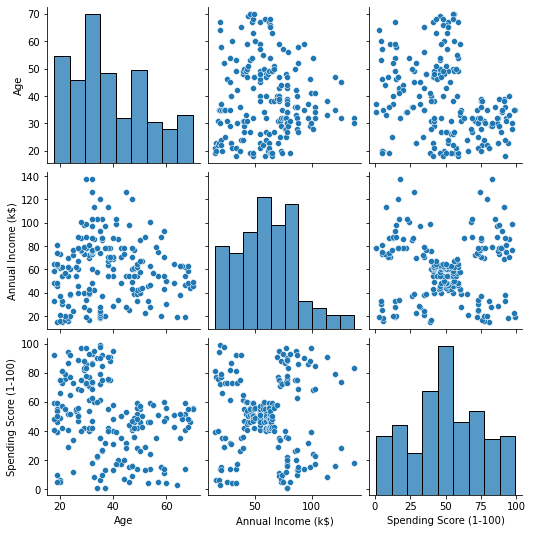

In [6]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

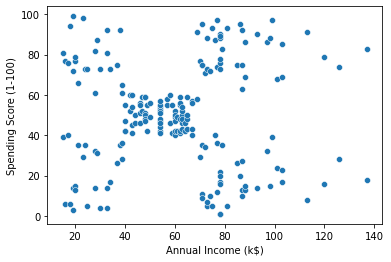

In [7]:
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])

# Visualizing Hierarchical Structure with Dendrograms (Single and complete)

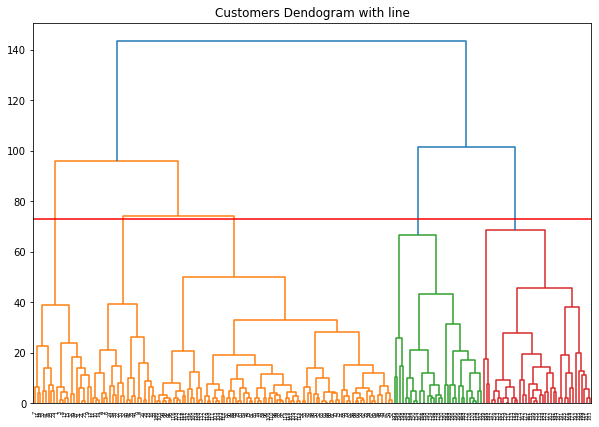

In [33]:
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 2:4]

plt.title("Customers Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

# Implementing an Agglomerative Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clustering_model.fit(selected_data)
clustering_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

Text(0.5, 1.0, 'Labeled Customer Data')

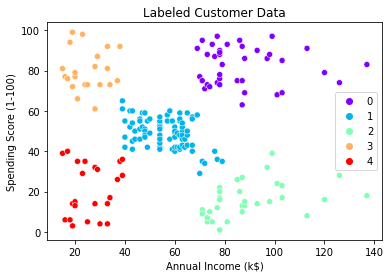

In [34]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')